# Setup

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Prepare IRIS dataset

In [3]:
iris = pd.read_csv('iris.csv')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


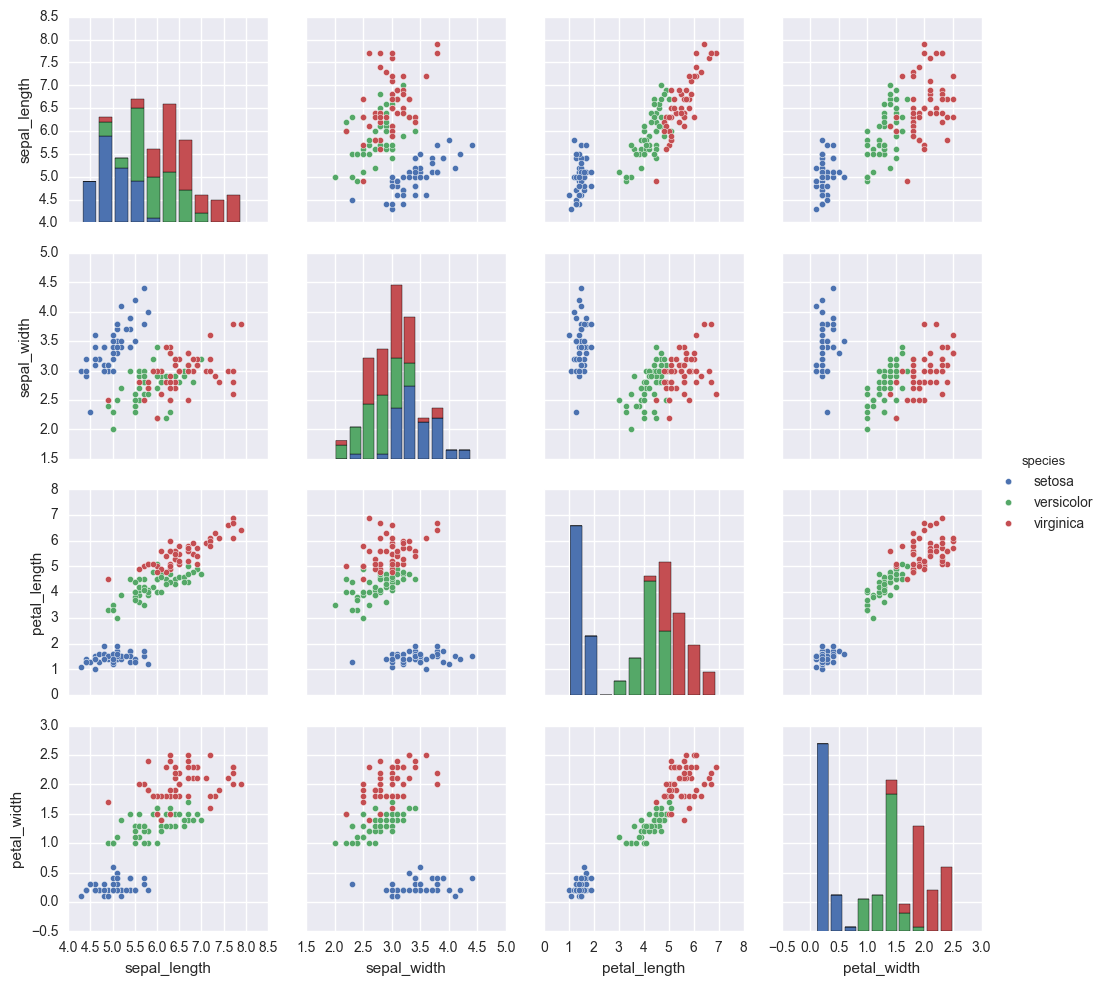

In [5]:
sns.pairplot(iris, hue="species")

In [6]:
X = iris.values[:, :4]
y = iris.values[:, 4]

# Logistic Regression

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV

/Users/roger19890107/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=0)

In [9]:
train_X[:5, :]

array([[4.6, 3.1, 1.5, 0.2],
       [5.9, 3.0, 5.1, 1.8],
       [5.1, 2.5, 3.0, 1.1],
       [4.6, 3.4, 1.4, 0.3],
       [6.2, 2.2, 4.5, 1.5]], dtype=object)

In [10]:
train_y[:5]

array(['setosa', 'virginica', 'versicolor', 'setosa', 'versicolor'], dtype=object)

In [29]:
from collections import Counter
Counter(train_y)

Counter({'setosa': 29, 'versicolor': 20, 'virginica': 26})

In [30]:
Counter(test_y)

Counter({'setosa': 21, 'versicolor': 30, 'virginica': 24})

In [11]:
lr = LogisticRegressionCV(cv=3, n_jobs=4, penalty='l2')
lr.fit(train_X, train_y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=4, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [12]:
lr_accuracy = lr.score(test_X, test_y)
print("Accuracy = {:.2f}".format(lr_accuracy))

Accuracy = 0.83


# Deep Neural Network using Keras

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils

Using TensorFlow backend.


## One hot encoder 

In [14]:
uniques, ids = np.unique(train_y, return_inverse=True)
uniques, ids

(array(['setosa', 'versicolor', 'virginica'], dtype=object),
 array([0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0,
        2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0,
        2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0,
        0, 0, 2, 1, 2, 0]))

In [15]:
np_utils.to_categorical(ids, len(uniques))[:5, :]

array([[ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

In [16]:
# ex: arr = ['a', 'b', 'c'] -> [[1,0,0], [0,1,0], [0,0,1]]
def encode_one_hot(arr):
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

In [17]:
train_y_ohe = encode_one_hot(train_y)
test_y_ohe = encode_one_hot(test_y)

In [18]:
train_y_ohe[:5, :]

array([[ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

## DNN model with 2 hidden layers 

In [19]:
model = Sequential()

In [20]:
# 4 -> 16
model.add(Dense(input_dim=4, output_dim=16))
model.add(Activation(('relu')))
model.add(Dropout(0.2))

In [21]:
# 16 -> 16
model.add(Dense(output_dim=16))
model.add(Activation(('relu')))
model.add(Dropout(0.2))

In [22]:
# 16 -> 3
model.add(Dense(3))
model.add(Activation('softmax'))

In [23]:
# Adam: A Method for Stochastic Optimization: https://arxiv.org/abs/1412.6980
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [24]:
model.fit(train_X, train_y_ohe, nb_epoch=100, batch_size=10)

Epoch 1/100
75/75 [==============================] - 0s - loss: 4.2090 - acc: 0.4133     
Epoch 2/100
75/75 [==============================] - 0s - loss: 3.7116 - acc: 0.3600     
Epoch 3/100
75/75 [==============================] - 0s - loss: 3.2526 - acc: 0.4000     
Epoch 4/100
75/75 [==============================] - 0s - loss: 2.6100 - acc: 0.3467     
Epoch 5/100
75/75 [==============================] - 0s - loss: 2.5642 - acc: 0.3467     
Epoch 6/100
75/75 [==============================] - 0s - loss: 2.2309 - acc: 0.2800     
Epoch 7/100
75/75 [==============================] - 0s - loss: 1.9196 - acc: 0.3333     
Epoch 8/100
75/75 [==============================] - 0s - loss: 1.8915 - acc: 0.2933     
Epoch 9/100
75/75 [==============================] - 0s - loss: 1.6618 - acc: 0.2667     
Epoch 10/100
75/75 [==============================] - 0s - loss: 1.5964 - acc: 0.3467     
Epoch 11/100
75/75 [==============================] - 0s - loss: 1.5031 - acc: 0.2667     
Epoch 12

In [25]:
loss, dnn_accuracy = model.evaluate(test_X, test_y_ohe)

32/75 [===========>..................] - ETA: 0s

In [26]:
print("Accuracy = {:.2f}".format(dnn_accuracy))

Accuracy = 0.93


In [36]:
model.predict_classes(np.array([[2,3,4,1]]))

1/1 [==============================] - 0s


array([2])

In [37]:
model.predict(np.array([[2,3,4,1]]))

array([[ 0.1865917 ,  0.32462826,  0.48878008]], dtype=float32)

In [39]:
model.predict_classes(test_X)

32/75 [===========>..................] - ETA: 0s

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1,
       2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2, 0,
       0, 2, 1, 0, 0, 1])